In [2]:
from tensorflow.keras.preprocessing.text import one_hot

In [3]:
sent=['the glass of milk',
     'the glass of juice',
     'the cup of tea',
     'I am a good boy',
     'I am a good developer',
     'understand the meaning of the words',
     'your videos are good']

In [4]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of the words',
 'your videos are good']

In [5]:
voc_size=10000 #vocabulary size

# One Hot representation

In [6]:
onehot_repr=[one_hot(words,voc_size) for words in sent]
print(onehot_repr)

[[5241, 3405, 8300, 2606], [5241, 3405, 8300, 8861], [5241, 7799, 8300, 3124], [4725, 5043, 4609, 9260, 1504], [4725, 5043, 4609, 9260, 1073], [1193, 5241, 7033, 8300, 5241, 6674], [6403, 8702, 4067, 9260]]


In [8]:
onehot_repr

[[5241, 3405, 8300, 2606],
 [5241, 3405, 8300, 8861],
 [5241, 7799, 8300, 3124],
 [4725, 5043, 4609, 9260, 1504],
 [4725, 5043, 4609, 9260, 1073],
 [1193, 5241, 7033, 8300, 5241, 6674],
 [6403, 8702, 4067, 9260]]

# Word Embedding Representation

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [12]:
import numpy as np

In [13]:
sent_len=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_len)
print(embedded_docs)

[[   0    0    0    0 5241 3405 8300 2606]
 [   0    0    0    0 5241 3405 8300 8861]
 [   0    0    0    0 5241 7799 8300 3124]
 [   0    0    0 4725 5043 4609 9260 1504]
 [   0    0    0 4725 5043 4609 9260 1073]
 [   0    0 1193 5241 7033 8300 5241 6674]
 [   0    0    0    0 6403 8702 4067 9260]]


In [16]:
dim=15 # no of dimensions to represents each word.

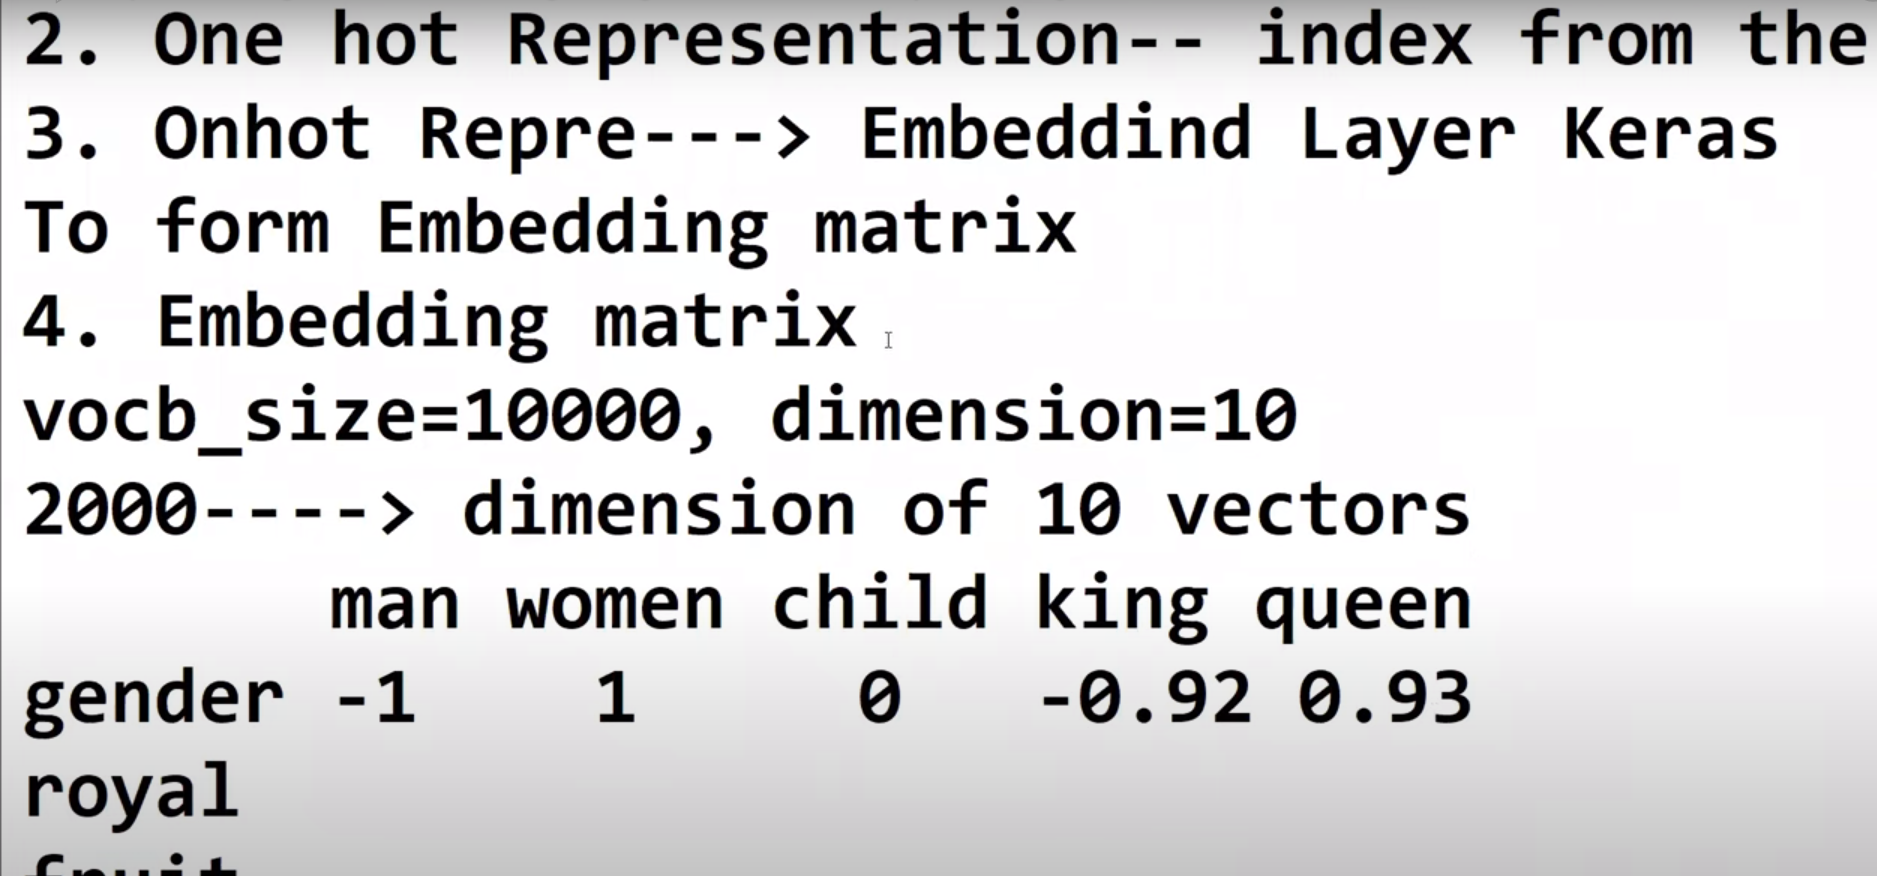

> Y AXIS DIMENSIONS ARE FEATURES, IN THIS CASE ARE 15.

In [20]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_len))
model.compile('adam','mse')

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(model.predict(embedded_docs))

[[[ 2.23906748e-02 -1.96789391e-02 -1.15909688e-02  3.21404673e-02
   -9.87986475e-03 -3.33611593e-02 -7.41940737e-03 -5.38550317e-04
   -8.15963745e-03  3.88806723e-02]
  [ 2.23906748e-02 -1.96789391e-02 -1.15909688e-02  3.21404673e-02
   -9.87986475e-03 -3.33611593e-02 -7.41940737e-03 -5.38550317e-04
   -8.15963745e-03  3.88806723e-02]
  [ 2.23906748e-02 -1.96789391e-02 -1.15909688e-02  3.21404673e-02
   -9.87986475e-03 -3.33611593e-02 -7.41940737e-03 -5.38550317e-04
   -8.15963745e-03  3.88806723e-02]
  [ 2.23906748e-02 -1.96789391e-02 -1.15909688e-02  3.21404673e-02
   -9.87986475e-03 -3.33611593e-02 -7.41940737e-03 -5.38550317e-04
   -8.15963745e-03  3.88806723e-02]
  [-7.66810030e-03  9.97073576e-03  1.18753091e-02  3.75063457e-02
   -4.15295139e-02 -4.25663106e-02 -4.28566001e-02 -1.32728815e-02
    3.39787267e-02 -2.71049738e-02]
  [ 2.96037458e-02  9.42795351e-03 -4.13097627e-02  3.88453640e-02
    3.49493138e-02 -4.66302522e-02  3.33901085e-02 -3.47256288e-02
   -1.62512437e-

In [26]:
print(model.predict(embedded_docs)[0])

[[ 0.02239067 -0.01967894 -0.01159097  0.03214047 -0.00987986 -0.03336116
  -0.00741941 -0.00053855 -0.00815964  0.03888067]
 [ 0.02239067 -0.01967894 -0.01159097  0.03214047 -0.00987986 -0.03336116
  -0.00741941 -0.00053855 -0.00815964  0.03888067]
 [ 0.02239067 -0.01967894 -0.01159097  0.03214047 -0.00987986 -0.03336116
  -0.00741941 -0.00053855 -0.00815964  0.03888067]
 [ 0.02239067 -0.01967894 -0.01159097  0.03214047 -0.00987986 -0.03336116
  -0.00741941 -0.00053855 -0.00815964  0.03888067]
 [-0.0076681   0.00997074  0.01187531  0.03750635 -0.04152951 -0.04256631
  -0.0428566  -0.01327288  0.03397873 -0.02710497]
 [ 0.02960375  0.00942795 -0.04130976  0.03884536  0.03494931 -0.04663025
   0.03339011 -0.03472563 -0.01625124  0.01735491]
 [-0.0230636  -0.03941404 -0.0038313  -0.00343295  0.00555551 -0.03179894
   0.01325652 -0.02489903 -0.02756975  0.03389068]
 [ 0.00305518  0.01738611 -0.02302929 -0.02309028  0.02920523  0.04037943
  -0.0307512   0.03196933 -0.03574526  0.02285601]]

> In the above case,
* We can see 8 arrays of arrays,
* 8 represents each word in the encoded sentence
* embedded_docs[1] represents, the embedding of the sentence 1.
* each array has 10 values, which represents 10 features, where each word in the encoded sentence has been converted into the dimension of 1- vectors

In [36]:
i=model.predict(embedded_docs)[1]

In [39]:
i

array([[ 0.02239067, -0.01967894, -0.01159097,  0.03214047, -0.00987986,
        -0.03336116, -0.00741941, -0.00053855, -0.00815964,  0.03888067],
       [ 0.02239067, -0.01967894, -0.01159097,  0.03214047, -0.00987986,
        -0.03336116, -0.00741941, -0.00053855, -0.00815964,  0.03888067],
       [ 0.02239067, -0.01967894, -0.01159097,  0.03214047, -0.00987986,
        -0.03336116, -0.00741941, -0.00053855, -0.00815964,  0.03888067],
       [ 0.02239067, -0.01967894, -0.01159097,  0.03214047, -0.00987986,
        -0.03336116, -0.00741941, -0.00053855, -0.00815964,  0.03888067],
       [-0.0076681 ,  0.00997074,  0.01187531,  0.03750635, -0.04152951,
        -0.04256631, -0.0428566 , -0.01327288,  0.03397873, -0.02710497],
       [ 0.02960375,  0.00942795, -0.04130976,  0.03884536,  0.03494931,
        -0.04663025,  0.03339011, -0.03472563, -0.01625124,  0.01735491],
       [-0.0230636 , -0.03941404, -0.0038313 , -0.00343295,  0.00555551,
        -0.03179894,  0.01325652, -0.02489903

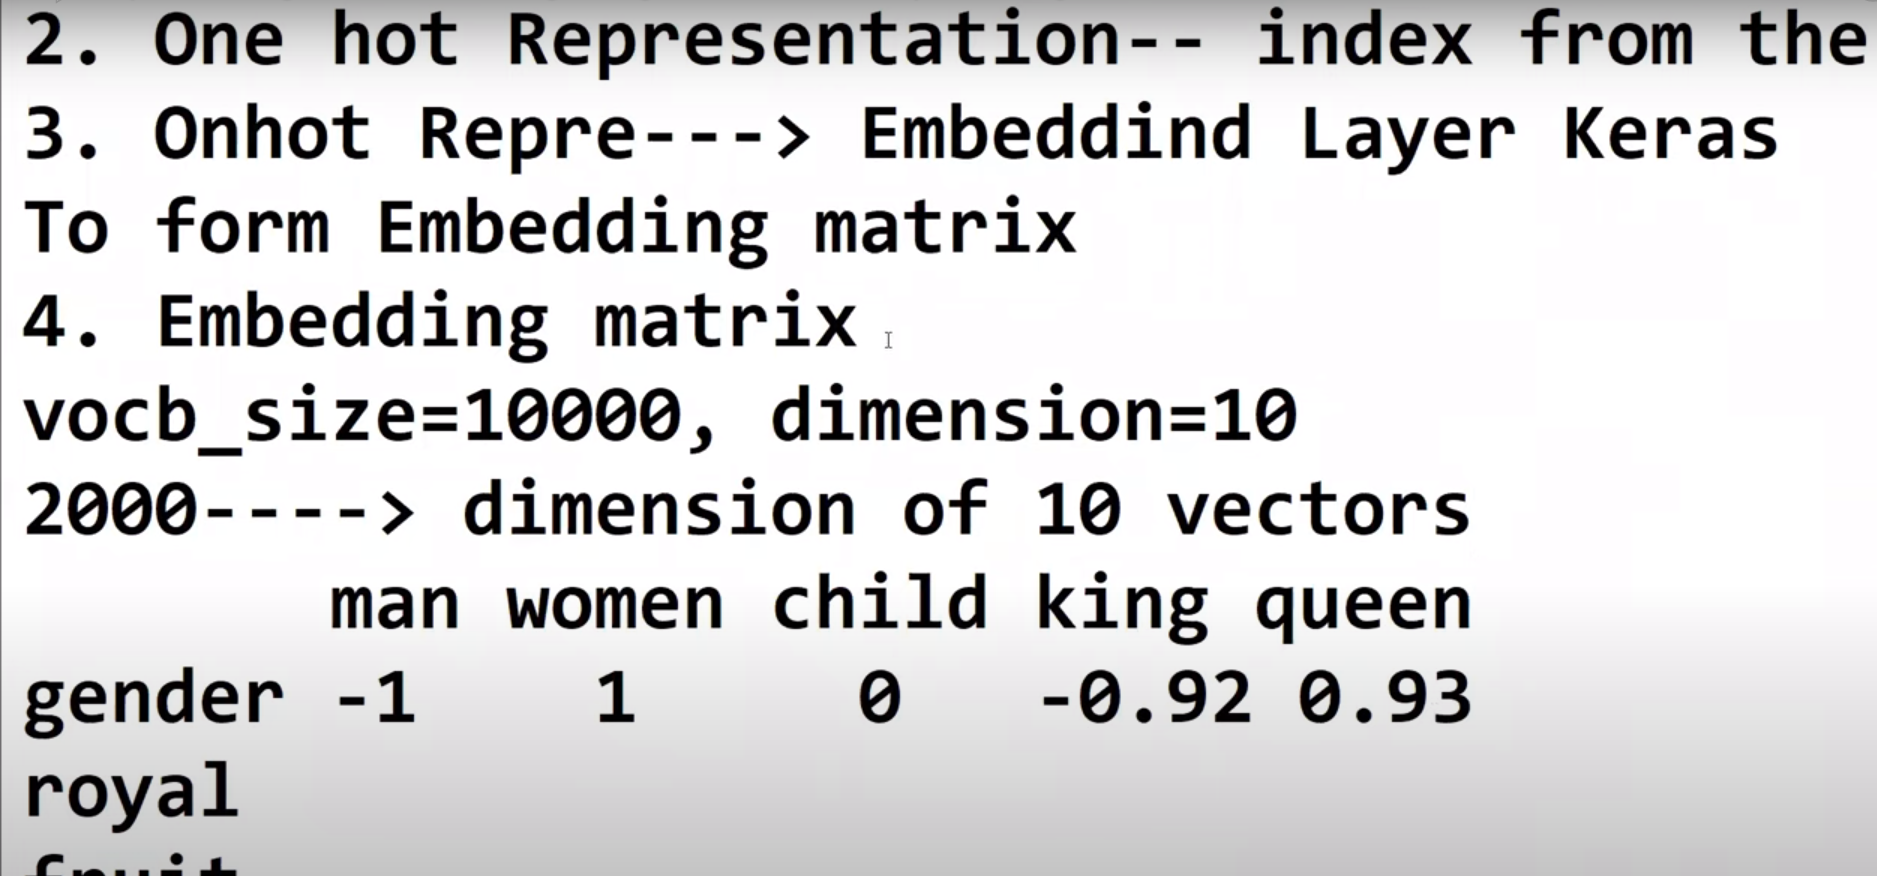

# Man,Women, Child, King, Queen,...... are all words from the document corpus/text.
# Whereas the gender,royal,fruit are the 10 dimensions that will be created by the Embedding.

In [28]:
embedded_docs[0]

array([   0,    0,    0,    0, 5241, 3405, 8300, 2606])

In [29]:
embedded_docs[1]

array([   0,    0,    0,    0, 5241, 3405, 8300, 8861])